**EJERCICIO 1**: APROXIMAR EL VALOR DE LA INTEGRAL $\displaystyle \int_0^{\pi}sin(x)dx = 2$ CON REGLAS COMPUESTAS DEL RECTÁNGULO Y TRAPECIO CON UN NÚMERO DE SUBINTERVALOS $n \in \{1,10,20,30,40 \}$ Y HACER GRÁFICA DE LA FORMA ERROR RELATIVO VS $n$ ($n$ EN EL EJE HORIZONTAL)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sympy as sp
from numpy import sin, arange, cos, array,linspace, sum
from math import pi, e
import scipy.integrate as integrate

**1.** APROXIMACIÓN PUNTO MEDIO/PUNTO MEDIO COMPUESTO

In [2]:
#calculando la integral analítica:
a=0.0
b=pi
f= lambda x: sin(x)
I = integrate.quad(f,a,b)

print (I[0])


2.0


In [3]:
#formula punto medio:

a=0.0
b=m.pi
f= lambda x: sin(x)
def midpoint_1(a,b,f):
    x=(a+b)/2
    return f(x)*(b-a)

In [4]:
midpoint_1(a,b,f)

3.141592653589793

In [5]:
#formula punto medio compuesto

def midpoint(n,a,b,f):
    h = (b-a)/n
    x = np.zeros(n)
    fx= np.zeros(n)
    x[0]=a+(h/2)
    fx[0]=f(x[0])
    for i in range(0,n-2):
        x[i+1]=x[i]+h 
        fx[i+1]=f(x[i+1])
    return (np.sum(fx))*h
n1=100
a1=0
b1=pi
f1 = lambda x: sin(x)
n=4
midpoint_compuesto=np.zeros(n+1)
for j in range (1,n+1):
    midpoint_compuesto[j] = midpoint(j*10, a1, b1, f1)  
print('integral_midpoint_compuesto=', midpoint_compuesto[1:n+1])
IMC = midpoint_compuesto[1:n+1]
print (IMC)
        

integral_midpoint_compuesto= [1.95910307 1.98973332 1.99543354 1.99743068]
[1.95910307 1.98973332 1.99543354 1.99743068]


In [7]:
IA=(-1)*I[0]*np.ones(4)
print (IA)
intervalos = [10, 20, 30, 40]
intervalos=  array(intervalos)
er_m= abs(IMC+IA)/abs(IA)
print (er_m) #vector de errores cuando n=[10, 20, 30, 40]

[-2. -2. -2. -2.]
[0.02044846 0.00513334 0.00228323 0.00128466]


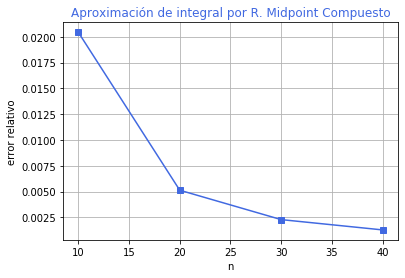

In [8]:
plt.plot(intervalos,er_m, 's-', color='#4169E1')

plt.title ('Aproximación de integral por R. Midpoint Compuesto', color= '#4169E1') #adding a title
plt.xlabel('n') #add label to x-axis
plt.ylabel('error relativo') #add label to x-axis
plt.grid(True) #adding coordinate grid
plt.show() #showing plot on screen

**2.** APROXIMACIÓN POR REGLA DEL TRAPECIO/TRAPECIO COMPUESTO

In [9]:
from math import sin, pi
f = lambda x: sin(x)
a=0
b=pi


In [10]:
#When n=1
n=1
h=(b-a)/n
S= 0.5*(f(a)+f(b))
for i in range(1, n):
    S += f(a+ i*h)
trapecio_1 = h * S
print('integral_trapecio_1=', trapecio_1)

integral_trapecio_1= 1.9236706937217898e-16


In [11]:

#when n=
def trapecio_compuesto(n,a,b,f):
    h = (b-a)/n
    x = np.zeros(n)
    fx= np.zeros(n)
    x[0]=a
    fx[0]=f(x[0])
    for i in range(0,n-2):
        x[i+1]=x[i]+h 
        fx[i+1]=f(x[i+1])
    return (2*np.sum(fx)-fx[0]-fx[n-1])*(h/2)
n1=100
a1=0
b1=pi
f1 = lambda x: sin(x)
n=4
integral_trapecio_compuesto_vector=np.zeros(n+1)
for j in range (1,n+1):
    integral_trapecio_compuesto_vector[j] = trapecio_compuesto(j*10, a1, b1, f1)  
print('integral_trapecio=', integral_trapecio_compuesto_vector[1:n+1])

ITC= integral_trapecio_compuesto_vector[1:n+1]


integral_trapecio= [1.88644299 1.9713133  1.98722577 1.99280965]


In [12]:
#Calculando el error relativo
IA=(-1)*I[0]*np.ones(4)
print (IA)
intervalos = [10, 20, 30, 40]
intervalos=  array(intervalos)
er_t= abs(ITC+IA)/abs(IA)
print (er_t) #vector de errores cuando n=[10, 20, 30, 40]


[-2. -2. -2. -2.]
[0.05677851 0.01434335 0.00638712 0.00359518]


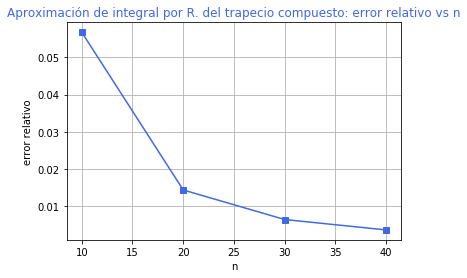

In [13]:
plt.plot(intervalos, er_t , 's-', color='#4169E1')
plt.title ('Aproximación de integral por R. del trapecio compuesto: error relativo vs n', color= '#4169E1') #adding a title
plt.xlabel('n') #add label to x-axis
plt.ylabel('error relativo') #add label to x-axis
plt.grid(True) #adding coordinate grid
plt.show() #showing plot on screen


**EJERCICIO 2:** APROXIMAR LA INTEGRAL DE:
$$\displaystyle \int_0^1e^{-\frac{t^2}{2}}dt$$

CON CUADRATURA GAUSS-LEGENDRE CON $n \in \{0,1,2,3,4\}$. REALIZAR LA GRÁFICA DE LA FORMA ERROR RELATIVO VS $n$. **VALOR A APROXIMAR: $.855624391892149$**


_*Cuadratura de Gauss-Legendre:*_

$$\int\limits_a^b f(x)\,dx \approx \frac{b-a}{2} \sum\limits_{i=1}^{n} { A_i f(x_i)} $$

*donde las abcisas $x_i$ son computadas a partir de:* $x = \frac{b+a}{2} + \frac{b-a}{2} \xi $

Y para una integral en $[a,b]$ se tiene:

$$\displaystyle \int_{a}^{b}f(t)dt \approx \frac{(b-a)}{2} \displaystyle \sum_{i=0}^nw_if \left (\frac{1}{2}[(b-a)x_i+a+b] \right )$$
con los pesos definidos para el intervalo $[-1,1]$

In [14]:
valor_integral= 0.855624391892149

In [15]:
a = 0.0; b = 1
f = lambda x: e**(-((x**2))/2)

In [16]:
#Construyendo una matriz con los valores de Xi:

X = [[0,0,0,0,0,0],
    [-0.577350, 0.577350, 0, 0, 0, 0], 
    [-0.774597, 0.00000, 0.774597, 0, 0, 0], 
    [-0.861136,-0.339981, 0.339981, 0.861136, 0, 0], 
    [-0.906180,-0.538469, 0.000000, 0.538469, 0.906180, 0],
    [-0.932470, -0.661209, -0.238619, 0.238619, 0.661209, 0.932470]]

X = array(X)

#Construyendo una matriz con los valores de Ai:
A1 = [[2,0,0,0,0,0],
     [1.000000, 1.000000, 0, 0, 0, 0],
     [0.555556, 0.888889, 0.555556, 0, 0, 0],
     [0.347855, 0.652145, 0.652145, 0.347855, 0, 0],
     [ 0.236927, 0.478629, 0.568889, 0.478629, 0.236927, 0],
     [0.171324, 0.360762, 0.467914, 0.467914, 0.360762, 0.171324]]

A1=array(A1)


In [17]:
#Definiendo la función gauss legendre:
def gauss_legendre(n,f, a, b, X, A1):
    x = np.zeros(6)
    for j in range(6):
        x[j] = f(((b+a)/2) + ((b-a)/2) * X[n][j])
    return np.dot(A1[n],x)

legendre_vector = np.zeros(6) 
for n in range(6):
   legendre_vector[n] = ((b-a)/2)*gauss_legendre(n,f, a, b, X, A1)
print("Aproximación: ", legendre_vector)


Aproximación:  [0.8824969  0.85531459 0.85562679 0.85562439 0.85562483 0.85562442]


In [18]:
#Calculando el error relativo

IA=(-1)*valor_integral*np.ones(6)
print (IA)

er= abs(legendre_vector+IA)/abs(IA)
print (er) #vector de errores cuando n=[0, 1, 2, 3, 4, 5]


[-0.85562439 -0.85562439 -0.85562439 -0.85562439 -0.85562439 -0.85562439]
[3.14069011e-02 3.62080873e-04 2.80444306e-06 2.22294231e-09
 5.06873946e-07 2.90474851e-08]


In [19]:
subintervalos=[0, 1, 2, 3, 4, 5]
subintervalos=array(subintervalos)

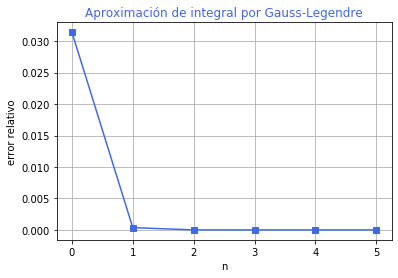

In [20]:
plt.plot(subintervalos,er, 's-', color='#4169E1')

plt.title ('Aproximación de integral por Gauss-Legendre', color= '#4169E1') #adding a title
plt.xlabel('n') #add label to x-axis
plt.ylabel('error relativo') #add label to x-axis
plt.grid(True) #adding coordinate grid
plt.show() #showing plot on screen

**EJERCICIO 3:** APROXIMAR LAS INTEGRALES:

$$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty te^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$



DONDE: $\sigma=0.25, \mu=0.15$ CUYOS VALOR ES: $0.15$ CON CUADRATURA DE GAUSS-HERMITE. PARA LO ANTERIOR, REALIZAR CAMBIO DE VARIABLE $x=\frac{t-\mu}{\sqrt{2\sigma^2}}, dt=\sqrt{2\sigma^2}dx$.


Despejando se obtiene:  $$t = x \sqrt{2\sigma^{2}} + u$$

$$t^2 = (x \sqrt{2\sigma^{2}} + u)^{2}$$

$$dt = \sqrt{2\sigma^{2}} dx$$

*Cuadratura Gauss-Hermite*

$$\int\limits_{-\infty}^\infty e^{-x^{2}} f(x)dx \approx \sum\limits_{x=0}^{n} Ai f(xi)$$

Desarrollando la primera integral a fin que quede en la forma determinada para aplicar la Cuadratura Gauss-Hermite:
$${1 \over \pi} \int_{-\infty}^\infty (x \sqrt{2\sigma^{2}} + u) e^{-x^2}dx$$ 

Donde:
$$f(x)= (x \sqrt{2\sigma^{2}} + u)$$
    

In [21]:
a = 0.353553391; b = 0.15
f = lambda x: a*x+b
C=0.564189584

In [22]:
#Construyendo una matriz con los valores de Xi:

X = [[0.707107, -0.707107, 0, 0, 0, 0], 
    [0, 1.224745, -1.224745, 0, 0, 0], 
    [0.524648, - 0.524648, 1.65068, -1.65068, 0, 0], 
    [0, 0.958572, -0.958572, 2.020183, -2.020183, 0],
    [0.436077, -0.436077, 1.335849, -1.335849, 2.350605, -2.350605]]

X=array(X)

#Construyendo una matriz con los valores de Ai:
A1 = [[0.886227, 0.886227, 0, 0, 0, 0],
     [1.181636, 0.295409, 0.295409, 0, 0, 0],
     [0.804914, 0.804914, 0.0813128, 0.0813128, 0, 0],
     [0.945308, 0.393619, 0.393619, 0.0199532, 0.0199532, 0],
     [0.724629, 0.724629, 0.157067, 0.157067, 0.00453001, 0.00453001]]

A1=array(A1)


In [23]:
#Definiendo la funciòn hermite:
def hermite(n,f, a, b, X, A1):
    fx = np.zeros(6)
    for j in range(6):
        fx[j] = f(X[n][j])
    print (fx)    
    return np.dot(A1[n],fx)
hermite_vector = np.zeros(5) 
for n in range(5):
   hermite_vector[n] = C*hermite(n,f, a, b, X, A1)
print("Aproximación de la primera integral: ", hermite_vector)

[ 0.40000008 -0.10000008  0.15        0.15        0.15        0.15      ]
[ 0.15        0.58301275 -0.28301275  0.15        0.15        0.15      ]
[ 0.33549108 -0.03549108  0.73360351 -0.43360351  0.15        0.15      ]
[ 0.15        0.48890638 -0.18890638  0.86424255 -0.56424255  0.15      ]
[ 0.3041765  -0.0041765   0.62229394 -0.32229394  0.98106437 -0.68106437]
Aproximación de la primera integral:  [0.15000001 0.15000001 0.14999998 0.14999988 0.14999985]


$$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty t^2e^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$

DONDE: $\sigma=0.25, \mu=0.15$ CUYO VALOR ES $0.085$ CON CUADRATURA DE GAUSS-HERMITE. PARA LO ANTERIOR, REALIZAR CAMBIO DE VARIABLE $x=\frac{t-\mu}{\sqrt{2\sigma^2}}, dt=\sqrt{2\sigma^2}dx$.


In [24]:
#Definiendo la función hermite:
f = lambda x: (a*x+b)**2
hermite_vector = np.zeros(5) 
for n in range(5):
   hermite_vector[n] = C*hermite(n,f, a, b, X, A1)
print("Aproximación de la segunda integral: ", hermite_vector)
    

[0.16000006 0.01000002 0.0225     0.0225     0.0225     0.0225    ]
[0.0225     0.33990386 0.08009622 0.0225     0.0225     0.0225    ]
[0.11255426 0.00125962 0.53817411 0.18801201 0.0225     0.0225    ]
[0.0225     0.23902945 0.03568562 0.74691519 0.31836966 0.0225    ]
[9.25233444e-02 1.74431697e-05 3.87249753e-01 1.03873386e-01
 9.62487295e-01 4.63848674e-01]
Aproximación de la segunda integral:  [0.08500005 0.08500002 0.08500002 0.08499987 0.08499984]
